<a href="https://colab.research.google.com/github/SIluk13/G-Colaboratory-Project/blob/main/pddc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/c35.csv')
data.head()

,ProID,Info,Unnamed: 2,time,Vol.,Unnamed: 5
0,GenTime,2022-06-18 07:57,NaN,0.000000e+00,-0.01,NaN
1,FileName,c35.csv,NaN,4.000000e-09,-0.01,NaN
2,Record Length,7000.000000 Points,NaN,8.000000e-09,-0.01,NaN
3,Sample Interval,4.000000e-09 s,NaN,1.200000e-08,-0.01,NaN
4,Trigger Time,0.000000e+00 S,NaN,1.600000e-08,-0.01,NaN


In [3]:
data['time']

0       0.000000e+00
1       4.000000e-09
2       8.000000e-09
3       1.200000e-08
4       1.600000e-08
            ...     
6995    2.798000e-05
6996    2.798400e-05
6997    2.798800e-05
6998    2.799200e-05
6999    2.799600e-05
Name: time, Length: 7000, dtype: float64

In [4]:
data['Vol.']

0      -0.01
1      -0.01
2      -0.01
3      -0.01
4      -0.01
        ... 
6995   -0.01
6996   -0.01
6997   -0.01
6998   -0.01
6999   -0.01
Name: Vol., Length: 7000, dtype: float64

In [5]:
datapd = pd.DataFrame(list(zip(list(data['time']*1000000),list(data['Vol.']*1000))))
datapd.columns = ['Times(us)','Amplitude(mV)']

In [6]:
datapd.head(10)

,Times(us),Amplitude(mV)
0,0.000,-10.0
1,0.004,-10.0
2,0.008,-10.0
3,0.012,-10.0
4,0.016,-10.0
5,0.020,-10.0
6,0.024,-10.0
7,0.028,-10.0
8,0.032,-10.0
9,0.036,-10.0


In [16]:
display(datapd[(datapd['Amplitude(mV)']>4)])

,Times(us),Amplitude(mV)
2217,8.868,10.0
2273,9.092,10.0
2324,9.296,10.0
2714,10.856,10.0
3423,13.692,10.0
...,...,...
6750,27.000,10.0
6813,27.252,10.0
6883,27.532,10.0
6888,27.552,10.0


In [17]:
display(datapd.loc[(datapd['Amplitude(mV)']<-4)])

,Times(us),Amplitude(mV)
0,0.000,-10.0
1,0.004,-10.0
2,0.008,-10.0
3,0.012,-10.0
4,0.016,-10.0
...,...,...
6995,27.980,-10.0
6996,27.984,-10.0
6997,27.988,-10.0
6998,27.992,-10.0


In [22]:
pd_P=datapd[(datapd['Amplitude(mV)']>30)]
print(pd_P)

      Times(us)  Amplitude(mV)
3498     13.992           90.0
3499     13.996           90.0
3500     14.000          130.0
3501     14.004          170.0
3502     14.008          190.0
...         ...            ...
3730     14.920           50.0
3731     14.924           50.0
3732     14.928           50.0
3733     14.932           50.0
3734     14.936           50.0

[235 rows x 2 columns]


In [23]:
pd_N=datapd[(datapd['Amplitude(mV)']<-30)]
print(pd_N)

      Times(us)  Amplitude(mV)
3778     15.112          -60.0
3782     15.128          -60.0
3784     15.136          -60.0
3786     15.144          -60.0
3787     15.148          -60.0
...         ...            ...
5062     20.248          -60.0
5076     20.304          -60.0
5078     20.312          -60.0
5115     20.460          -60.0
5148     20.592          -60.0

[1198 rows x 2 columns]


In [24]:
result = pd.concat([pd_P, pd_N])
display(result)

,Times(us),Amplitude(mV)
3498,13.992,90.0
3499,13.996,90.0
3500,14.000,130.0
3501,14.004,170.0
3502,14.008,190.0
...,...,...
5062,20.248,-60.0
5076,20.304,-60.0
5078,20.312,-60.0
5115,20.460,-60.0


In [25]:
jmlh = len(result)
print(jmlh)

1433


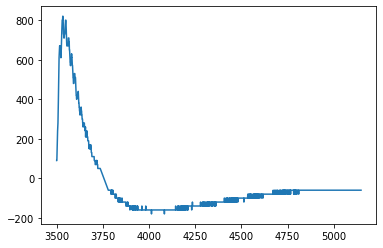

In [26]:
result['Amplitude(mV)'].plot()

In [43]:
dQ = result.diff(axis = 0, periods = 1)
display(dQ)

,Times(us),Amplitude(mV)
3498,NaN,NaN
3499,0.004,0.0
3500,0.004,40.0
3501,0.004,40.0
3502,0.004,20.0
...,...,...
5062,0.016,0.0
5076,0.056,0.0
5078,0.008,0.0
5115,0.148,0.0


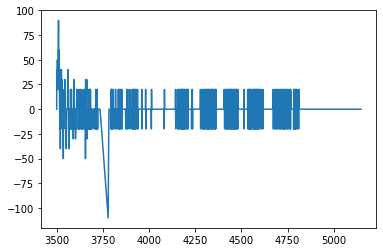

In [44]:
dQ['Amplitude(mV)'].plot()

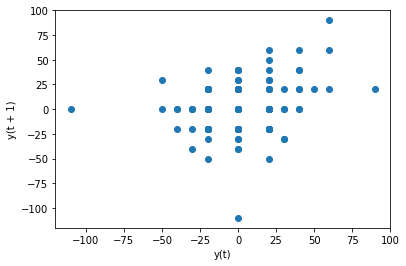

In [46]:
from pandas.plotting import lag_plot
lag_plot(dQ['Amplitude(mV)'])
plt.show()

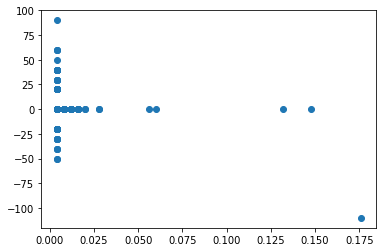

In [51]:
plt.scatter(dQ['Times(us)'],dQ['Amplitude(mV)'])

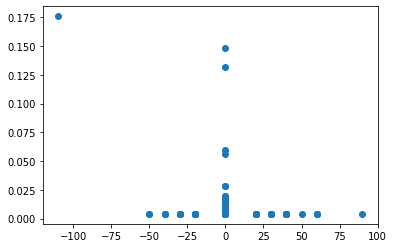

In [52]:
plt.scatter(dQ['Amplitude(mV)'],dQ['Times(us)'])

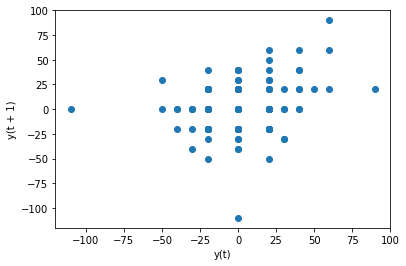

In [53]:
from pandas.plotting import lag_plot
lag_plot(dQ['Amplitude(mV)'])
plt.show()

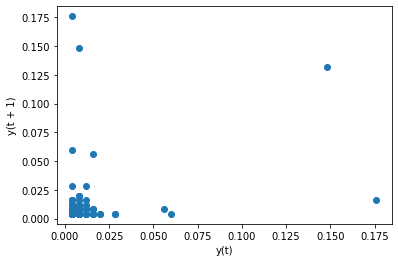

In [54]:
from pandas.plotting import lag_plot
lag_plot(dQ['Times(us)'])
plt.show()